In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pickle

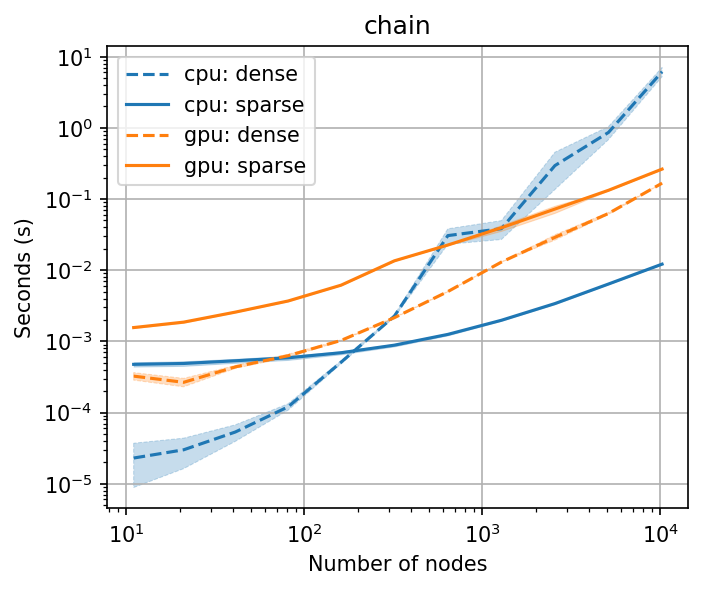

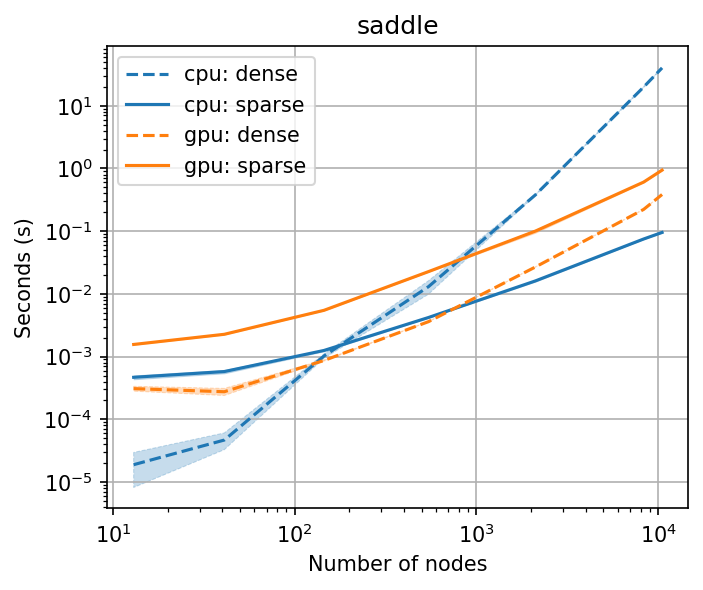

In [75]:
study_names = ['chain', 'saddle', 'tower']

devices = ['cpu', 'gpu']
model_types = ['dense', 'sparse']

colors = {'cpu': 'tab:blue', 'gpu': 'tab:orange'}
ls = {'sparse': '-', 'dense': '--'}


for study_name in study_names:

    info_list = pickle.load(open(f'{study_name}_results.pkl', 'rb'))

    fig = plt.figure(figsize=(5, 4), dpi=150)

    for device in devices:

        for model_type in model_types:

            num_nodes = []
            num_edges = []

            times_mean = []
            times_median = []
            times_std = []
            times_upper = []
            times_lower = []

            for info in info_list.values():

                num_nodes.append(info['num_nodes'])
                num_edges.append(info['num_edges'])

                # times is a list of times of len num reps for the same num nodes and edges 
                times = info[device][model_type]['xyz_time']
                sorted_times = sorted(times)

                times_mean.append(np.mean(times))
                times_std.append(np.std(times))
                
                times_lower.append(sorted_times[0])
                times_median.append(sorted_times[1])
                times_upper.append(sorted_times[-1])

            plt.title(study_name)
            plt.yscale('log')
            plt.xscale('log')
            plt.xlabel('Number of nodes')
            plt.ylabel('Seconds (s)')

            times_mean = np.asarray(times_mean)
            times_std = np.asarray(times_std)
            times_lower = np.asarray(times_lower)
            times_upper = np.asarray(times_upper)
            
            plt.plot(num_nodes,
                    times_mean,
                    color=colors[device],
                    linestyle=ls[model_type],                
                    label=f'{device}: {model_type}')
            
            plt.fill_between(x=num_nodes,
                            y1=times_mean-times_std,
                            y2=times_mean+times_std,
                            color=colors[device],
                            alpha=0.25,
                            linestyle=ls[model_type],
                            lw=0.5)
            
    plt.grid()
    plt.legend()
    plt.show()